In [1]:
source("Main.R")
source("Conf.R")
source("Utilities.R")
library("factoextra")
library("maptree")
library(igraph)
library(Hmisc)
library(ggpubr)
library(BiRewire)

corrplot 0.92 loaded

Warning message:
“package ‘ggplot2’ was built under R version 4.2.2”

Attaching package: ‘pls’


The following object is masked from ‘package:corrplot’:

    corrplot


The following object is masked from ‘package:stats’:

    loadings


Warning message:
“package ‘data.table’ was built under R version 4.2.2”

Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Loading required package: cluster

Loading required package: rpart


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


Warnin

In [2]:
annoCols<-list(GeneGroup=c(GeneGroup_0="#1B9E77",
                           GeneGroup_1="#D95F02",
                           GeneGroup_2="#7570B3",
                           GeneGroup_3="#E7298A", 
                           GeneGroup_4="#66A61E", 
                           GeneGroup_5="#E6AB02", 
                           GeneGroup_6="#A6761D", 
                           GeneGroup_7="#666666"),
                 GuideGroup=c(K0="#1f77b4", 
                              K1="#ff7f0e", 
                              K2="#279e68", 
                              K3="#d62728", 
                              K4="#aa40fc",
                              K5="#8c564b"))


In [3]:
realE3s = as.data.frame(read.csv(file.path(projectDir,"ManuscriptFigures","220610_regulators_metadata_E3_Complex.csv")),
                             stringsAsFactors = FALSE)
e3s = unique(realE3s$Symbol_guides)
e3s = e3s[e3s != '']
length(e3s)

[1] 165

In [4]:
koModules = read.csv("./../TextFiles/ME_GuideModules_leiden_6_Modules.csv", row.names = 1)
geneModules = read.csv("./../TextFiles/ME_GeneModules_leiden_11_Modules.csv", row.names = 1)
allConsideredGenes = unique(c(koModules$GuideName, geneModules$GeneName))
length(allConsideredGenes)

[1] 1346

In [30]:
# proInf = read.csv("./../PositiveControls/10090.protein.aliases.v11.5.txt", sep="\t")
# proInf = unique(proInf[proInf$alias %in% allConsideredGenes,c("X.string_protein_id", "alias")])
# colnames(proInf) = c("ProID", "GeneName")
# dim(proInf)

In [31]:
# allInteractions = read.csv("./../PositiveControls/10090.protein.links.detailed.txt", sep = " ")
# allInteractions = allInteractions[allInteractions$protein1 %in% proInf$ProID,]
# allInteractions = allInteractions[allInteractions$protein2 %in% proInf$ProID,]
# write.csv(allInteractions, "./../TextFiles/10090.protein.links.detailed_ourGenes.txt", row.names=FALSE)


# allInteractions = read.csv("./../TextFiles/10090.protein.links.detailed_ourGenes.txt")
# proInf_1 = copy(proInf)

# allInteractions$ProID = allInteractions$protein1
# colnames(proInf_1) = c("ProID", "GeneName_1")
# allInteractions = merge(allInteractions, proInf_1, by="ProID")


# allInteractions$ProID = allInteractions$protein2
# colnames(proInf_1) = c("ProID", "GeneName_2")

# allInteractions = merge(allInteractions, proInf_1, by="ProID")

# allInteractions = allInteractions[allInteractions$experimental != 0,]

# allInteractions = allInteractions[,c("GeneName_1", "GeneName_2", "experimental", 
#                                      "neighborhood", "fusion", "cooccurence", 
#                                     "coexpression", "database", "textmining",
#                                     "combined_score")]

# allInteractions$GenePair = apply(allInteractions, 1, function(x){ paste0(sort( c(x[["GeneName_1"]], x[["GeneName_2"]])), collapse = "_" )})

# allInteractions = unique(allInteractions[,c("GenePair", "experimental", 
#                                      "neighborhood", "fusion", "cooccurence", 
#                                     "coexpression", "database", "textmining",
#                                     "combined_score")])

# allInteractions$GeneName_1 = sapply(allInteractions$GenePair, function(x){strsplit(x,"_")[[1]][1]})
# allInteractions$GeneName_2 = sapply(allInteractions$GenePair, function(x){strsplit(x,"_")[[1]][2]})

# allInteractions = allInteractions[,c("GeneName_1", "GeneName_2", "experimental", 
#                                      "neighborhood", "fusion", "cooccurence", 
#                                     "coexpression", "database", "textmining",
#                                     "combined_score", "GenePair")]


In [32]:
#write.csv(allInteractions, "./../TextFiles/STRING_Interactions.csv", row.names=FALSE)

In [33]:
# allInteractions_KOs = allInteractions[allInteractions$GeneName_1 %in% koModules$GuideName,]
# allInteractions_KOs = allInteractions_KOs[allInteractions_KOs$GeneName_2 %in% koModules$GuideName,]

In [34]:
# allInteractions_E3s = allInteractions[allInteractions$GeneName_1 %in% e3s,]
# allInteractions_E3s = allInteractions_E3s[allInteractions_E3s$GeneName_2 %in% e3s,]

In [6]:
coefsAll = read.csv("./../MixedEffectLMOutputs/ME_SignificantBetaCoefs.csv", row.names = 1)
rownames(coefsAll) = sapply(rownames(coefsAll), function(x){strsplit(x,"_")[[1]][2]})
myCorr = rcorr(t(coefsAll), type="pearson")

myCovar = data.frame(myCorr$r)
myCovar_Pvals = data.frame(myCorr$P)

myCovar[myCovar_Pvals > 0.05] = 0

In [7]:
myCovar

,Aamp,Acaca,Ago2,Ahctf1,Ahr,Akt1,Ambra1,Amfr,Anapc11,Anapc13,⋯,Zbtb14,Zbtb17,Zbtb25,Zbtb49,Zbtb7a,Zbtb7b,Zfp106,Zfp91,Zmiz1,Zmiz2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aamp,1.00000000,-0.18176407,0.24958534,0.00000000,0.18167766,0.00000000,-0.48792504,-0.10213478,0.07275333,0.20011668,⋯,0.09704256,0.00000000,-0.34357101,0.24174552,0.00000000,0.00000000,-0.10570337,0.07349639,0.23337595,-0.08538910
Acaca,-0.18176407,1.00000000,-0.08645689,0.00000000,-0.11552689,0.00000000,0.27995227,0.00000000,0.00000000,-0.06896610,⋯,0.00000000,0.07576105,0.27496741,-0.11721397,0.00000000,0.00000000,0.07912084,0.00000000,-0.16030923,0.13689919
Ago2,0.24958534,-0.08645689,1.00000000,0.00000000,0.06129549,0.00000000,-0.19462939,-0.06752640,0.08119483,0.14555829,⋯,0.08883376,0.08059958,-0.12906871,0.11727980,0.00000000,0.00000000,0.00000000,0.00000000,0.15518478,0.00000000
Ahctf1,0.00000000,0.00000000,0.00000000,1.00000000,0.07254807,0.00000000,0.00000000,0.00000000,0.09760732,0.14532238,⋯,0.00000000,0.00000000,0.00000000,0.08232492,0.08683255,0.13486020,0.12414374,0.00000000,0.00000000,0.00000000
Ahr,0.18167766,-0.11552689,0.06129549,0.07254807,1.00000000,-0.09237409,-0.23249484,0.00000000,0.00000000,0.09532040,⋯,0.00000000,-0.06133901,-0.17592839,0.19180456,0.00000000,0.00000000,-0.06938610,0.09804769,0.12868240,-0.12236253
Akt1,0.00000000,0.00000000,0.00000000,0.00000000,-0.09237409,1.00000000,-0.09206572,-0.11225328,0.07723158,0.10918961,⋯,0.00000000,0.09571719,-0.07746870,0.00000000,0.00000000,0.00000000,0.00000000,-0.19460374,-0.06182447,0.00000000
Ambra1,-0.48792504,0.27995227,-0.19462939,0.00000000,-0.23249484,-0.09206572,1.00000000,0.19510953,-0.07160368,-0.19130789,⋯,0.00000000,0.06657262,0.60058070,-0.31883808,0.00000000,0.00000000,0.16483571,0.00000000,-0.25436143,0.26116972
Amfr,-0.10213478,0.00000000,-0.06752640,0.00000000,0.00000000,-0.11225328,0.19510953,1.00000000,-0.09839477,-0.09376449,⋯,0.00000000,-0.06427130,0.15448980,-0.06933338,0.00000000,0.00000000,0.00000000,0.08007819,0.00000000,0.00000000
Anapc11,0.07275333,0.00000000,0.08119483,0.09760732,0.00000000,0.07723158,-0.07160368,-0.09839477,1.00000000,0.15231855,⋯,0.00000000,0.07342717,0.00000000,0.09580636,0.08067419,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


In [8]:
write.csv(myCovar, "KO_Covar.csv")

In [36]:
getInteractionGraph <- function(IntGraph, myCovar, koModules){
    
    for(i in 1:nrow(IntGraph)){
    
        IntGraph[i,"CorValue"] = myCovar[IntGraph[i,"GeneName_1"], IntGraph[i,"GeneName_2"]]
    }
    
    
    koModulesSelected = koModules[koModules$GuideName %in% unique(c(IntGraph$GeneName_1, IntGraph$GeneName_2)),]
    
    
    
    km1 = copy(koModulesSelected)
    colnames(km1) = c("GuideName", "GuideGroup_gene1", "GuideColor_gene1")

    IntGraph$GuideName = IntGraph$GeneName_1
    IntGraph = merge(IntGraph,km1, by="GuideName")
    
    
    km2 = copy(koModulesSelected)
    colnames(km2) = c("GuideName", "GuideGroup_gene2", "GuideColor_gene2")
    
    IntGraph$GuideName = IntGraph$GeneName_2
    IntGraph = merge(IntGraph,km2, by="GuideName")

    g2 <- graph.data.frame(IntGraph[,c("GeneName_1","GeneName_2")],
                           vertices=koModulesSelected,
                           directed=FALSE)
    
    return(list(myGr = g2, IntGraph=IntGraph))

}

In [37]:
# GroupByVertex01 = function(Groups, spacing = 5) {
#          Position = (order(Groups) + spacing*Groups)
#          Angle    = Position * 2 * pi / max(Position)
#          matrix(c(cos(Angle), sin(Angle)), ncol=2)
# }

# GroupByVertex02 = function(Groups) {
#          numGroups = length(unique(Groups))
#          GAngle    = (1:numGroups) * 2 * pi / numGroups
#          Centers   = matrix(c(cos(GAngle), sin(GAngle)), ncol=2)
#          x = y = c()
#          for(i in 1:numGroups) {
#                  curGroup = which(Groups == unique(Groups)[i])
#                  VAngle = (1:length(curGroup)) * 2 * pi / length(curGroup)
#                  x = c(x, Centers[i,1] + cos(VAngle) / numGroups )
#                  y = c(y, Centers[i,2] + sin(VAngle) / numGroups)
#          }
#          matrix(c(x, y), ncol=2)
# }


In [38]:
#allInteractions_E3s = allInteractions_E3s[allInteractions_E3s$experimental > 199,]

In [39]:
# res1 = getInteractionGraph(allInteractions_KOs, myCovar, koModules)
# res1 = res1$IntGraph
#res1$GuideName = NULL
#write.csv(res1, "All_329_KOs.csv", row.names=FALSE)

In [40]:
# res2 = getInteractionGraph(allInteractions_E3s, myCovar, koModules)
# res2 = res2$IntGraph
# res2$GuideName = NULL
# res2 = res2[which(res2$GeneName_1 != res2$GeneName_2),]
#write.csv(res2, "Only_E3s.csv", row.names=FALSE)

In [41]:
res2 <- read.csv("Only_E3s.csv")
head(res2)

,GeneName_1,GeneName_2,experimental,neighborhood,fusion,cooccurence,coexpression,database,textmining,combined_score,GenePair,CorValue,GuideGroup_gene1,GuideColor_gene1,GuideGroup_gene2,GuideColor_gene2
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<chr>,<int>,<chr>
1,Ambra1,Ankfy1,132,0,0,0,79,0,0,166,Ambra1_Ankfy1,0.3956825,3,#d62728,1,#ff7f0e
2,Anapc11,Ankfy1,140,0,0,0,62,0,60,175,Anapc11_Ankfy1,0.0000000,2,#279e68,1,#ff7f0e
3,Ambra1,Arih1,86,0,0,0,0,0,222,258,Ambra1_Arih1,0.2127722,3,#d62728,3,#d62728
4,Ankfy1,Arih1,64,0,0,0,62,0,117,156,Ankfy1_Arih1,0.0000000,1,#ff7f0e,3,#d62728
5,Arih1,Arih2,173,0,0,0,50,0,157,280,Arih1_Arih2,0.0000000,3,#d62728,2,#279e68
6,Ankfy1,Bcl6,90,0,0,0,49,114,0,166,Ankfy1_Bcl6,-0.1511510,1,#ff7f0e,2,#279e68


In [42]:
res2$CorValueBinary = res2$CorValue
res2[res2$CorValue > 0, "CorValueBinary"] = 1
res2[res2$CorValue < 0, "CorValueBinary"] = -1
res2[res2$CorValue == 0, "CorValueBinary"] = NA

res2$GroupPair =  apply(res2,1, function(x){kk = c(x["GuideGroup_gene1"], x["GuideGroup_gene2"])
                          paste0(kk[order(kk)], collapse = "_")})

res2$GroupPair = factor(res2$GroupPair, levels = c('0_0', '0_1', '0_2', '0_3', '0_4', '0_5',
                                                  '1_1', '1_2', '1_3', '1_4', '1_5',
                                                  '2_2', '2_3', '2_4', '2_5',
                                                   '3_3', '3_4', '3_5',
                                                  '4_4', '4_5', '5_5'))

#res2 = res2[res2$experimental > 199,]
head(res2)

,GeneName_1,GeneName_2,experimental,neighborhood,fusion,cooccurence,coexpression,database,textmining,combined_score,GenePair,CorValue,GuideGroup_gene1,GuideColor_gene1,GuideGroup_gene2,GuideColor_gene2,CorValueBinary,GroupPair
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<chr>,<int>,<chr>,<dbl>,<fct>
1,Ambra1,Ankfy1,132,0,0,0,79,0,0,166,Ambra1_Ankfy1,0.3956825,3,#d62728,1,#ff7f0e,1,1_3
2,Anapc11,Ankfy1,140,0,0,0,62,0,60,175,Anapc11_Ankfy1,0.0000000,2,#279e68,1,#ff7f0e,NA,1_2
3,Ambra1,Arih1,86,0,0,0,0,0,222,258,Ambra1_Arih1,0.2127722,3,#d62728,3,#d62728,1,3_3
4,Ankfy1,Arih1,64,0,0,0,62,0,117,156,Ankfy1_Arih1,0.0000000,1,#ff7f0e,3,#d62728,NA,1_3
5,Arih1,Arih2,173,0,0,0,50,0,157,280,Arih1_Arih2,0.0000000,3,#d62728,2,#279e68,NA,2_3
6,Ankfy1,Bcl6,90,0,0,0,49,114,0,166,Ankfy1_Bcl6,-0.1511510,1,#ff7f0e,2,#279e68,-1,1_2


In [43]:
head(koModules)

,GuideName,GuideGroup,GuideColor
,<chr>,<int>,<chr>
Aamp,Aamp,4,#aa40fc
Bop1,Bop1,4,#aa40fc
Cirh1a,Cirh1a,4,#aa40fc
Dcaf13,Dcaf13,4,#aa40fc
Grb2,Grb2,4,#aa40fc
Myc,Myc,4,#aa40fc


In [44]:
uE3s = sort(unique(c(res2$GeneName_1, res2$GeneName_2)))
nUniqGenes = length(uE3s)

myDF = data.frame(matrix(0, nrow = nUniqGenes, ncol = nUniqGenes))
colnames(myDF) = uE3s
rownames(myDF) = uE3s
for(i in 1:nrow(res2)){
    myDF[res2[i,"GeneName_1"], res2[i,"GeneName_2"]] = res2[i,"CorValueBinary"]
    myDF[res2[i,"GeneName_2"], res2[i,"GeneName_1"]] = res2[i,"CorValueBinary"]
}


koModulesE3s = koModules[koModules$GuideName %in% uE3s,]
koModulesE3s$GuideGroup = paste0("K",koModulesE3s$GuideGroup)
koModulesE3s$GuideGroup = factor(koModulesE3s$GuideGroup, levels=unique(koModulesE3s$GuideGroup))



In [45]:
head(myDF)

,Ahr,Ambra1,Amfr,Anapc11,Anapc13,Ankfy1,Arih1,Arih2,Bcl6,Bid,⋯,Wdr20,Wdr26,Wdr3,Wdr70,Wdr82,Wwp1,Zbtb7a,Zfp91,Zmiz1,Zmiz2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ahr,0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
Ambra1,0,0,0,0,0,1,1,0,0,0,⋯,-1,0,0,0,1,0,0,0,0,0
Amfr,0,0,0,0,0,0,0,0,0,0,⋯,0,NA,0,0,0,NA,0,0,0,0
Anapc11,0,0,0,0,0,NA,0,0,0,0,⋯,NA,0,0,0,0,0,0,0,0,0
Anapc13,0,0,0,0,0,0,0,0,0,0,⋯,NA,0,0,0,0,0,0,0,0,0
Ankfy1,0,1,0,NA,0,0,NA,0,-1,0,⋯,-1,0,0,0,0,-1,NA,1,0,0


In [46]:
head(koModulesE3s)

,GuideName,GuideGroup,GuideColor
,<chr>,<fct>,<chr>
Dcaf13,Dcaf13,K4,#aa40fc
Grb2,Grb2,K4,#aa40fc
Ptpn11,Ptpn11,K4,#aa40fc
Rack1,Rack1,K4,#aa40fc
Tbl3,Tbl3,K4,#aa40fc
Uhrf1,Uhrf1,K4,#aa40fc


In [47]:
myDF = myDF[koModulesE3s$GuideName, koModulesE3s$GuideName]
dim(myDF)

[1] 164 164

In [48]:
write.csv(myDF, "S_4F.csv")

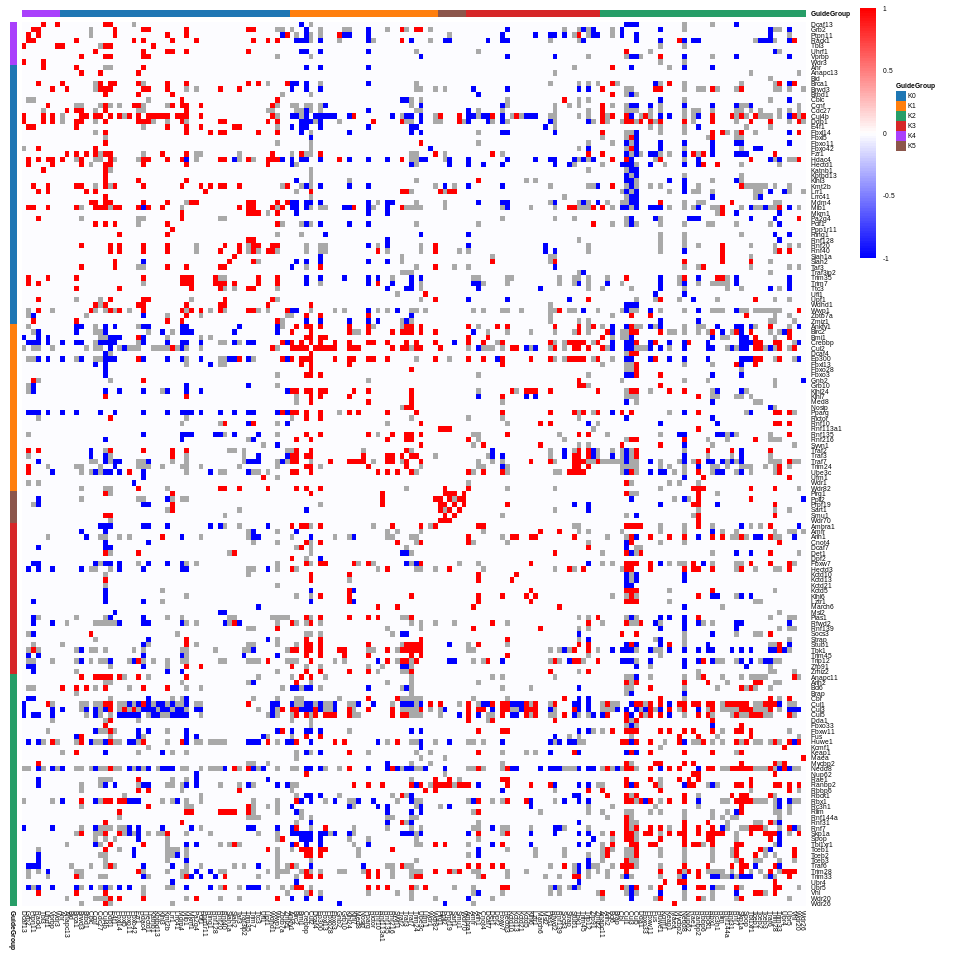

In [49]:
myDF = myDF[koModulesE3s$GuideName, koModulesE3s$GuideName]
annotDF = koModulesE3s[rownames(myDF),]
annotDF$GuideName = NULL
annotDF$GuideColor = NULL


options(repr.plot.width=8, repr.plot.height=8)
kk = pheatmap(myDF,
         annotation_col = annotDF,
         annotation_row = annotDF,
         annotation_colors = annoCols,
         cluster_rows=FALSE,
         cluster_cols=FALSE,
         clustering_method="ward.D2",
         clustering_distance_rows="euclidean",
               treeheight_row=0,
               treeheight_col=0,
              colorRampPalette(c("blue", "white", "red"))(100),
              fontsize=4,
              na_col="darkgrey")
 
#save_pheatmap_pdf(kk, "S_4F.pdf", width=14, height=12)

# hehe = myDF[colnames(myDF)[kk$tree_col$order],colnames(myDF)[kk$tree_col$order]]
# write.csv(hehe, "STRING_clustered_E3.csv")

In [59]:
dim(myDF)

[1] 164 164

In [61]:
164 - 141


[1] 23

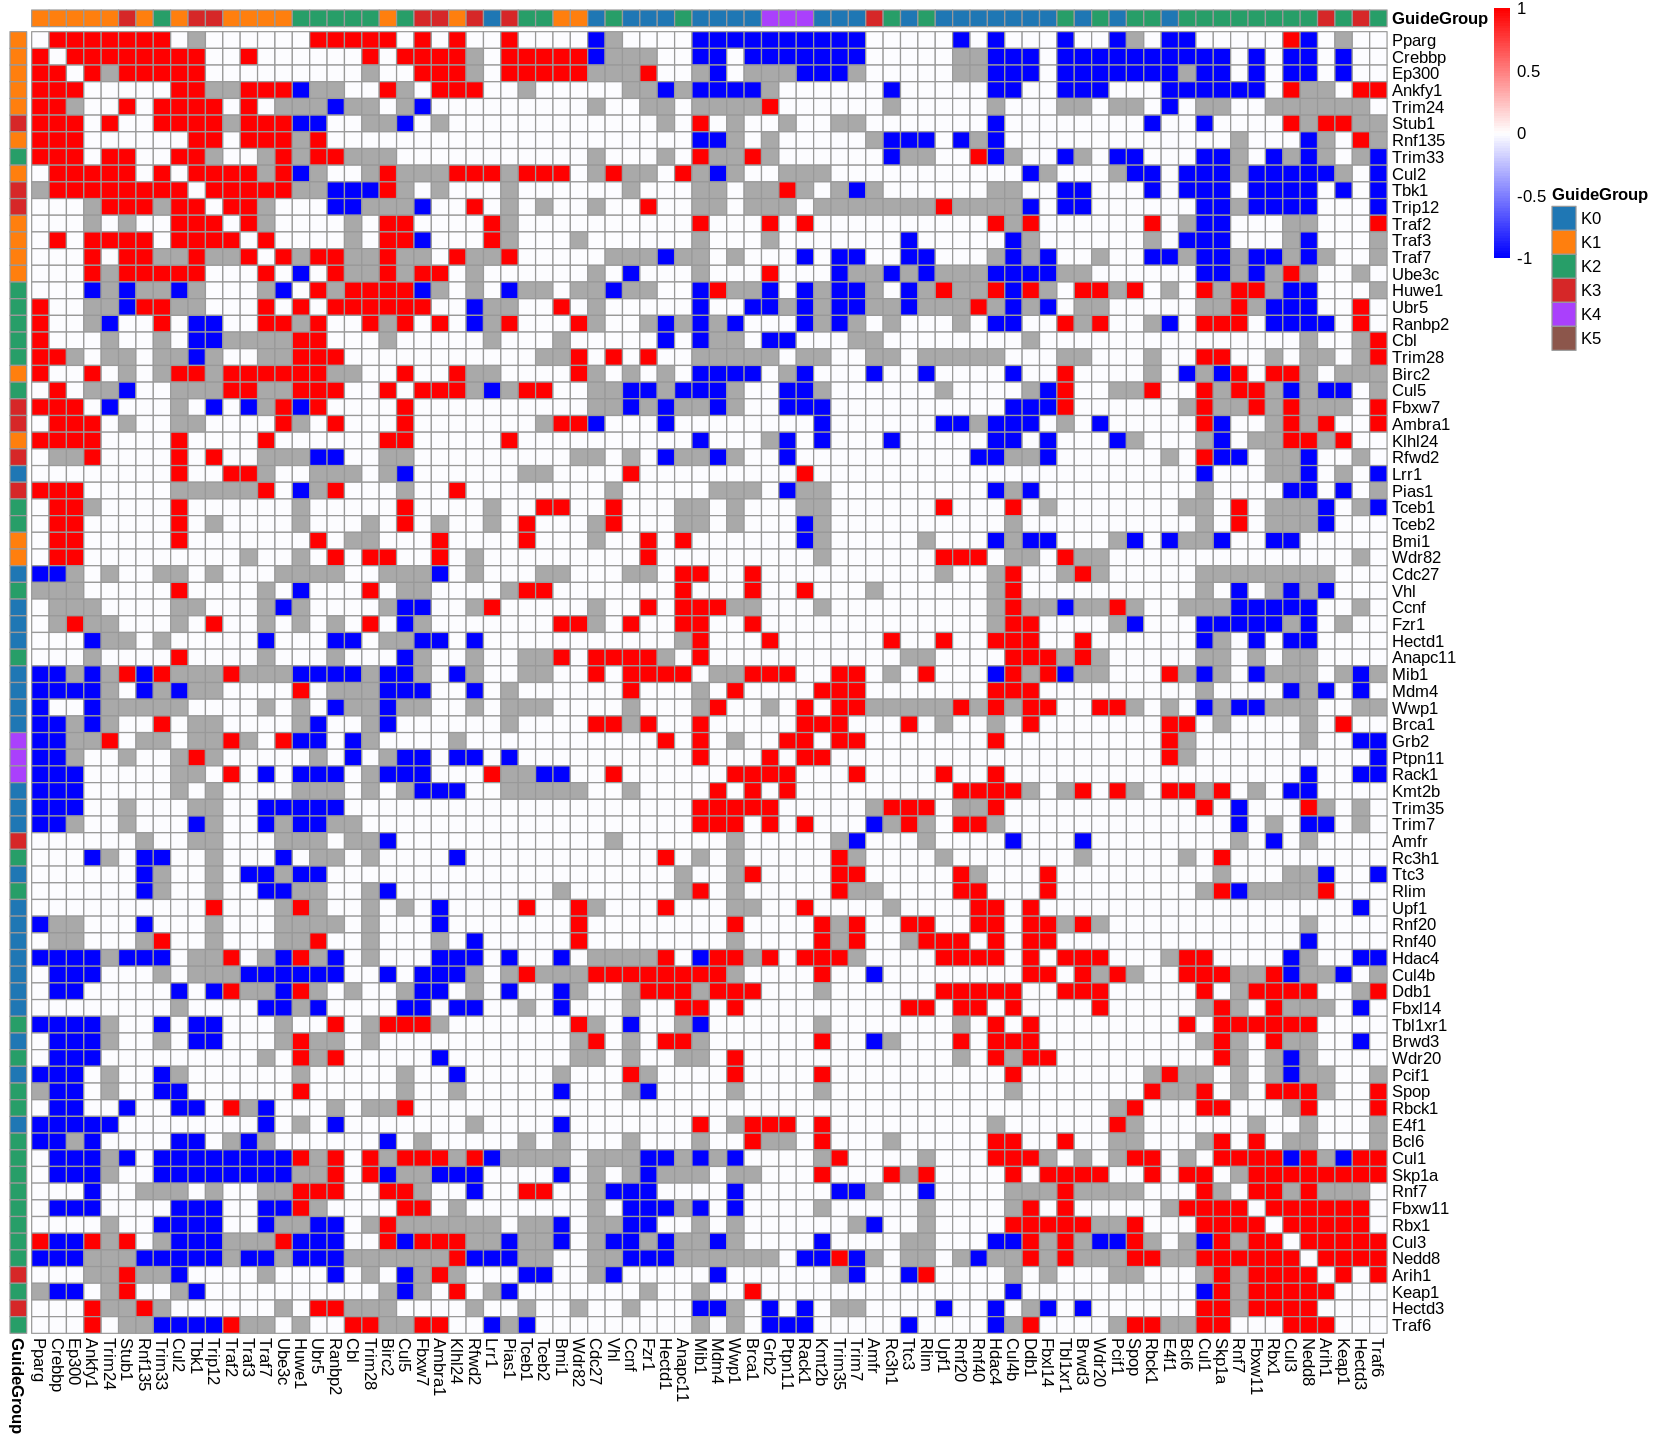

In [75]:
mm <- sapply(myDF, function(x){length(x[which(x == 0)])})
#hist(kk, breaks=100)

selGenes = names(mm[mm < 141])
myDF_selected = myDF[selGenes, selGenes]

annotDF = koModulesE3s[rownames(myDF_selected),]
annotDF$GuideName = NULL
annotDF$GuideColor = NULL


options(repr.plot.width=14, repr.plot.height=12)
kk = pheatmap(myDF_selected,
         annotation_col = annotDF,
         annotation_row = annotDF,
         annotation_colors = annoCols,
         clustering_method="ward.D2",
         treeheight_row=0,
         treeheight_col=0,
         clustering_distance_rows="euclidean",colorRampPalette(c("blue", "white", "red"))(100), na_col="darkgrey")

#save_pheatmap_pdf(kk, "Figure_3C.pdf", width=14, height=12)

In [76]:
mm

Dcaf13     Grb2   Ptpn11    Rack1     Tbl3    Uhrf1    Vprbp     Wdr3 
     151      127      132      122      155      148      144      160 
     Ahr  Anapc13      Bid    Brca1    Brwd3    Btbd1     Cblc     Ccnf 
     150      158      163      129      124      154      147      120 
   Cdc27    Cul4b     Ddb1     E4f1   Fbxl14    Fbxl5   Fbxo11   Fbxo42 
     123       77      102      139      133      154      148      148 
    Fzr1    Hdac4   Hectd1   Katnb1  Kbtbd13    Klhl3    Kmt2b     Lrr1 
     120       97      131      156      157      146      116      135 
  Lrrc41     Mdm4     Mib1    Mkrn1    Pa2g4    Pcif1  Ppp1r11    Ring1 
     155      119       88      151      144      137      163      152 
  Rnf128    Rnf20    Rnf40   Siah1a    Siah2     Taf3 Traf3ip2   Trim35 
     157      132      133      156      146      142      158      125 
   Trim7     Ttc3     Ufl1     Upf1    Wdhd1     Wwp1   Zbtb7a    Zmiz1 
     125      139      160      139      150       96      144      142 
  Ankfy1    Birc2     Bmi1   Crebbp     Cul2    Dcaf4    Ep300   Fbxl13 
     111      108      132       93       77      158       93      145 
  Fbxo28    Fbxo3     Gnb2    Grb10   Klhl24    Klhl7     Med8    Nosip 
     157      151      153      154      127      144      154      159 
   Pparg   Rictor    Rnf10 Rnf113a1   Rnf135   Rnf216    Syvn1    Traf2 
     115      152      145      159      128      142      151      128 
   Traf3    Traf7   Trim24    Ube3c     Ufm1     Wdr1    Wdr82    Plrg1 
     124       92      118      108      158      155      140      150 
   Ppil2   Prpf19    Sart1     Smu1    Wdr70   Ambra1     Amfr    Arih1 
     142      145      151      153      159      126      140      116 
   Cnot4    Dcaf7     Det1     Dpf2    Fbxw7   Hectd3   Kctd10   Kctd13 
     145      153      144      161      115      122      154      155 
  Kctd21    Kctd5    Klhl6    Lztr1   March6     Msl2    Pias1    Rfwd2 
     160      152      143      149      157      160      128      119 
  Rnf139    Socs3    Strap    Stub1     Tbk1   Trim45   Trip12    Zfp91 
     149      145      149      128      101      148       95      144 
   Zmiz2  Anapc11    Arih2     Bcl6     Brap      Cbl     Cul1     Cul3 
     144      130      144      128      159      135       63       63 
    Cul5     Dda1   Fbxo33   Fbxw11      Fus    Huwe1    Kcmf1    Keap1 
      78      150      157      124      143       83      160      134 
    Maea   Mycbp2    Nedd8    Nup62     Rae1   Ranbp2    Rbbp6    Rbck1 
     160      146       56      158      142      101      148      140 
    Rbx1    Rc3h1     Rlim  Rnf144a    Rnf31     Rnf7    Skp1a     Spop 
      95      138      132      145      143      108       98      137 
 Tbl1xr1    Tceb1    Tceb2    Tceb3    Traf6   Trim28   Trim33     Ubr4 
     121      127      132      144      113      101      109      157 
    Ubr5      Vhl    Wdr20    Wdr26 
     102      135      134      156

In [78]:
max(mm[mm < 141])

[1] 140

In [60]:
dim(myDF_selected)

[1] 78 78

In [71]:
hehe <- sapply(myDF_selected, function(x){length(which(x == 0))})
max(hehe)

[1] 59

In [72]:
78-59

[1] 19

In [68]:
hehe

Grb2  Ptpn11   Rack1   Brca1   Brwd3    Ccnf   Cdc27   Cul4b    Ddb1    E4f1 
     18      15      25      18      18      16       8      34      31      14 
 Fbxl14    Fzr1   Hdac4  Hectd1   Kmt2b    Lrr1    Mdm4    Mib1   Pcif1   Rnf20 
     20      19      37      19      20       9      22      33      11      14 
  Rnf40  Trim35   Trim7    Ttc3    Upf1    Wwp1  Ankfy1   Birc2    Bmi1  Crebbp 
     13      20      18      12      11      17      33      27      17      47 
   Cul2   Ep300  Klhl24   Pparg  Rnf135   Traf2   Traf3   Traf7  Trim24   Ube3c 
     34      37      21      34      18      16      20      26      12      25 
  Wdr82  Ambra1    Amfr   Arih1   Fbxw7  Hectd3   Pias1   Rfwd2   Stub1    Tbk1 
     11      22       5      19      24      18      13      15      21      31 
 Trip12 Anapc11    Bcl6     Cbl    Cul1    Cul3    Cul5  Fbxw11   Huwe1   Keap1 
     23      12      14      10      39      40      30      28      31      16 
  Nedd8  Ranbp2   Rbck1    Rbx1   Rc3h1    Rlim    Rnf7   Skp1a    Spop Tbl1xr1 
     39      32      13      27       8      12      21      38      13      23 
  Tceb1   Tceb2   Traf6  Trim28  Trim33    Ubr5     Vhl   Wdr20 
     12       9      25      12      23      29      12      12

In [52]:
head(koModulesE3s[rownames(myDF),])

,GuideName,GuideGroup,GuideColor
,<chr>,<fct>,<chr>
Dcaf13,Dcaf13,K4,#aa40fc
Grb2,Grb2,K4,#aa40fc
Ptpn11,Ptpn11,K4,#aa40fc
Rack1,Rack1,K4,#aa40fc
Tbl3,Tbl3,K4,#aa40fc
Uhrf1,Uhrf1,K4,#aa40fc


In [53]:
adjOrj = copy(myDF)
rownames(adjOrj) = paste0(rownames(adjOrj), "_",koModulesE3s[rownames(adjOrj),"GuideGroup"])
colnames(adjOrj) = paste0(colnames(adjOrj), "_",koModulesE3s[colnames(adjOrj),"GuideGroup"])
adjOrj[adjOrj != 0 | is.na(adjOrj)] = 1

adjOrjTmp = copy(adjOrj)
adjOrjTmp$Gene = rownames(adjOrjTmp)
adjOrjTmp = melt(adjOrjTmp, id.vars = "Gene")
adjOrjTmp$Group1 = sapply(adjOrjTmp$Gene, function(x){strsplit(as.character(x),"_")[[1]][2]})
adjOrjTmp$Group2 = sapply(adjOrjTmp$variable, function(x){strsplit(as.character(x),"_")[[1]][2]})
adjOrjTmp$GroupPair =  apply(adjOrjTmp,1, function(x){kk = c(x["Group1"], x["Group2"])
                          paste0(kk[order(kk)], collapse = "_")})

adjOrjTmp <- adjOrjTmp[adjOrjTmp$value == 1,]
observedInterFreq = data.frame(table(adjOrjTmp$GroupPair))
observedInterFreq

Var1,Freq
<fct>,<int>
K0_K0,367
K0_K1,494
K0_K2,882
K0_K3,348
K0_K4,86
K0_K5,40
K1_K1,178
K1_K2,634
K1_K3,328


In [54]:
observedInterFreq$G1 = sapply(observedInterFreq$Var1, function(x){strsplit(as.character(x),"_")[[1]][1]})
observedInterFreq$G2 = sapply(observedInterFreq$Var1, function(x){strsplit(as.character(x),"_")[[1]][2]})
head(observedInterFreq)

,Var1,Freq,G1,G2
,<fct>,<int>,<chr>,<chr>
1,K0_K0,367,K0,K0
2,K0_K1,494,K0,K1
3,K0_K2,882,K0,K2
4,K0_K3,348,K0,K3
5,K0_K4,86,K0,K4
6,K0_K5,40,K0,K5


In [20]:
# allSimulatedFreq = data.frame()


# for(k in 1:200){
#     adjOrjTmp = copy(adjOrj)
#     adjOrjTmp = birewire.rewire.undirected(adjOrjTmp) 


#     adjOrjTmp$Gene = rownames(adjOrjTmp)
#     adjOrjTmp = melt(adjOrjTmp, id.vars = "Gene")
#     adjOrjTmp$Group1 = sapply(adjOrjTmp$Gene, function(x){strsplit(as.character(x),"_")[[1]][2]})
#     adjOrjTmp$Group2 = sapply(adjOrjTmp$variable, function(x){strsplit(as.character(x),"_")[[1]][2]})
#     adjOrjTmp$GroupPair =  apply(adjOrjTmp,1, function(x){kk = c(x["Group1"], x["Group2"])
#                               paste0(kk[order(kk)], collapse = "_")})

#     adjOrjTmp <- adjOrjTmp[adjOrjTmp$value == 1,]
#     simulatedInterFreq = data.frame(table(adjOrjTmp$GroupPair))
#     allSimulatedFreq = rbind(allSimulatedFreq, simulatedInterFreq)
# }
# #saveRDS(allSimulatedFreq, "allSimulatedFreq_200Thresh.rds")

In [56]:
observedInterFreq$Var1 %ni% allSimulatedFreq$Var1

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [1]:
allSimulatedFreq = readRDS("allSimulatedFreq.rds")

In [2]:
allSimulatedFreq

Var1,Freq
<fct>,<int>
K0_K0,351
K0_K1,496
K0_K2,874
K0_K3,374
K0_K4,96
K0_K5,42
K1_K1,196
K1_K2,648
K1_K3,260


In [57]:
allSimulatedFreq = readRDS("allSimulatedFreq.rds")
#allSimulatedFreq = readRDS("allSimulatedFreq_200Thresh.rds")
allSgnMatrix = data.frame(matrix(NA, 6, 6))
allGroups = c("K0", "K1", "K2", "K3", "K4", "K5")
colnames(allSgnMatrix) = allGroups
rownames(allSgnMatrix) = allGroups

for(i in 1:nrow(observedInterFreq)){
    mObs = observedInterFreq[i,"Freq"]
    
    print(i)
    simFreq = allSimulatedFreq[as.character(allSimulatedFreq$Var1) ==  as.character(observedInterFreq[i,"Var1"]), "Freq"]
    
    allSgnMatrix[observedInterFreq[i,"G1"],observedInterFreq[i,"G2"]] = length(simFreq[simFreq>mObs]) / length(simFreq)
    
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21


In [58]:
allSgnMatrix

,K0,K1,K2,K3,K4,K5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
K0,0.005,0.850,0.520,0.830,0.640,0.6550000
K1,NA,0.625,0.740,0.000,0.115,1.0000000
K2,NA,NA,0.005,0.850,0.995,0.8850000
K3,NA,NA,NA,0.665,0.190,0.9450000
K4,NA,NA,NA,NA,0.000,0.2756757
K5,NA,NA,NA,NA,NA,0.0000000


In [ ]:
numberOfInteractions = sapply(myDF, function(x){164 - length(x[which(x == 0)])})
numberOfPositiveInteractions = sapply(myDF, function(x){length(x[which(x > 0)])})
numberOfNegativeInteractions = sapply(myDF, function(x){length(x[which(x < 0)])})
numberOfUncorrelationgInteractions = sapply(myDF, function(x){length(x[which(is.na(x))])})

observedInteractionCor = data.frame(numberOfInteractions = numberOfInteractions,
    ObservedPositiveInteractions = numberOfPositiveInteractions,
    ObservedNegativeInteractions = numberOfNegativeInteractions,
    numberOfUncorrelationgInteractions = numberOfUncorrelationgInteractions)
head(observedInteractionCor)

In [ ]:
obsInt = melt(observedInteractionCor[,c("ObservedPositiveInteractions", "ObservedNegativeInteractions")])
obsInt$Direction = "Positive_Correlations"
obsInt[obsInt$variable == "ObservedNegativeInteractions", "Direction"] = "Negative_Correlations"
obsInt$type = "Observed"
head(obsInt)

In [ ]:
myCovarTmp = myCovar[rownames(myDF), colnames(myDF)]
myCovarTmp[myCovarTmp > 0] = 1
myCovarTmp[myCovarTmp < 0] = -1

In [ ]:
allSampledInter = data.frame()

for(i in 1:100){
    adjCor = copy(myDF)
    adjCor[adjCor != 0 | is.na(adjCor)] = 1
    adjOrjTmp = birewire.rewire.undirected(adjCor)
    adjOrjTmp[adjOrjTmp == 0] = NA
    sampledInter = myCovarTmp * adjOrjTmp
    
    numberOfInteractions = sapply(sampledInter, function(x){164 - length(x[which(is.na(x))])})
    sampledInterPositiveInteractions = sapply(sampledInter, function(x){length(x[which(x > 0)])})
    sampledInterNegativeInteractions = sapply(sampledInter, function(x){length(x[which(x < 0)])})
    numberOfUncorrelationgInteractions = sapply(sampledInter, function(x){length(x[which(x == 0)])})

    sampledInteractionCor = data.frame(numberOfInteractions = numberOfInteractions,
        sampledPositiveInteractions = numberOfPositiveInteractions,
        sampledNegativeInteractions = numberOfNegativeInteractions,
        numberOfUncorrelationgInteractions = numberOfUncorrelationgInteractions)
    
    allSampledInter = rbind(allSampledInter, sampledInteractionCor)

}



In [ ]:
head(allSampledInter)

In [ ]:
sampInt = melt(allSampledInter[,c("sampledPositiveInteractions", "sampledNegativeInteractions")])
sampInt$Direction = "Positive_Correlations"
sampInt$type = "Sampled"
sampInt[sampInt$variable == "sampledNegativeInteractions", "Direction"] = "Negative_Correlations"
head(sampInt)

In [ ]:
allInter = rbind(sampInt, obsInt)

In [ ]:
options(repr.plot.width=6, repr.plot.height=4)

cList=list(c("Observed", "Sampled"))

ggplot(allInter, aes(x = type, y = value, color = type)) +
  geom_boxplot()+
  facet_wrap(~Direction)+
  labs(y = "Number of significant correlations ") +
  theme_minimal()+
  stat_compare_means(method = "wilcox.test", comparisons = cList)+theme(legend.position="None")+xlab("")

In [ ]:
myCovarE3s = myCovar[rownames(myDF), colnames(myDF)]
myCovarE3s$genes = rownames(myCovarE3s)
myCovarE3s = melt(myCovarE3s)
myCovarE3s = myCovarE3s[myCovarE3s$genes != myCovarE3s$variable,]
head(myCovarE3s)


In [ ]:
set.seed(6)
for( i in rownames(observedInteractionCor)){
    numInter_i = observedInteractionCor[i,"numberOfInteractions"]
    myCovarE3s_i = myCovarE3s[myCovarE3s$variable ==i,]

    sampledCor = myCovarE3s_i[sample(nrow(myCovarE3s_i), numInter_i),"value"]
    observedInteractionCor[i,"SampledPositiveInteractions"] = length(which(sampledCor > 0))
    observedInteractionCor[i,"SampledNegativeInteractions"] = length(which(sampledCor < 0))
    observedInteractionCor[i,"SampledNotSignInter"] = length(which(sampledCor == 0))
}

observedInteractionCor$ObservedCorrelatingInteractions = observedInteractionCor$ObservedPositiveInteractions + observedInteractionCor$ObservedNegativeInteractions
observedInteractionCor$SampledCorrelatingInteractions = observedInteractionCor$SampledPositiveInteractions + observedInteractionCor$SampledNegativeInteractions

observedInteractionCor$gene = rownames(observedInteractionCor)

In [ ]:
head(observedInteractionCor)

In [ ]:
xx = observedInteractionCor[,c("gene", "ObservedCorrelatingInteractions", "SampledCorrelatingInteractions")]
colnames(xx) = c("gene","Observed Interactions",  "Sampled Interactions" )
res = melt(xx, id.vars = "gene")


options(repr.plot.width=6, repr.plot.height=4)
ggpaired(res, x = "variable", y = "value", id = "gene",
         color = "variable", line.color = "gray", line.size = 0.1,
         palette = "jco") +
  labs(y = "Number of significant correlations ") +
  stat_compare_means(method = "wilcox.test", paired = TRUE)+theme(legend.position="None")+xlab("")

In [ ]:
xx = observedInteractionCor[,c("gene", "ObservedPositiveInteractions", "SampledPositiveInteractions")]
colnames(xx) = c("gene","Observed Interactions",  "Sampled Interactions" )
res = melt(xx, id.vars = "gene")

options(repr.plot.width=6, repr.plot.height=4)
ggpaired(res, x = "variable", y = "value", id = "gene",
         color = "variable", line.color = "gray", line.size = 0.1,
         palette = "jco") +
  labs(y = "Number of significant positive correlations") +
  stat_compare_means(method = "wilcox.test", paired = TRUE)+theme(legend.position="None")+xlab("")

In [ ]:
xx = observedInteractionCor[,c("gene", "ObservedNegativeInteractions", "SampledNegativeInteractions")]
colnames(xx) = c("gene","Observed Interactions",  "Sampled Interactions" )
res = melt(xx, id.vars = "gene")


options(repr.plot.width=6, repr.plot.height=4)
ggpaired(res, x = "variable", y = "value", id = "gene",
         color = "variable", line.color = "gray", line.size = 0.1,
         palette = "jco") +
  labs(y = "Number of significant negative correlations") +
  stat_compare_means(method = "wilcox.test", paired = TRUE)+theme(legend.position="None")+xlab("")

In [ ]:
head(observedInteractionCor)

In [ ]:
head(koModulesE3s)

In [ ]:
annoCols

In [ ]:
head(myDF)

In [ ]:
res1 = getInteractionGraph(allInteractions_KOs, myCovar, koModules)

options(repr.plot.width=15, repr.plot.height=15)
myGr = res1$myGr

GBV1 = GroupByVertex02(Groups = as.numeric(as.factor(V(myGr)$GuideColor)))

V(myGr)$color = V(myGr)$GuideColor
V(myGr)$label.cex = 1.2

E(myGr)$sign = ifelse( res1$IntGraph[,"CorValue"] > 0, 1, -1)
E(myGr)$color <- ifelse( E(myGr)$sign > 0, "red", "blue")

coords <- layout_(myGr, as_tree())
plot(myGr, vertex.size=5, layout=coords, vertex.label.color= "black")

In [ ]:
#write.csv(stringInt, "KnownInteractions_high.csv", row.names=FALSE)

In [ ]:
koModules

In [ ]:
# add_layout_(), component_wise(), 
# layout_as_bipartite(), layout_as_star(), 
# layout_as_tree(), layout_in_circle(), 
# layout_nicely(), layout_on_grid(), layout_on_sphere(),
# layout_randomly(), layout_with_dh(), layout_with_fr(), 
# layout_with_gem(), layout_with_graphopt(), layout_with_kk(), 
# layout_with_lgl(), layout_with_mds(), layout_with_sugiyama(), 
# merge_coords(), norm_coords(), normalize()



In [ ]:

GBV2 = GroupByVertex02(as.numeric(as.factor(V(g2)$GuideColor)))

In [ ]:
V(g2)$GuideColor

In [ ]:
set.seed(123)
df.g <- graph.data.frame(d = coefsAllE3sSgnMelted, directed = TRUE)
#df.g <- simplify(df.g)
V(df.g)$label.cex = 1.5
df.g
E(df.g)$sign = ifelse( coefsAllE3sSgnMelted$Value > 0, 1, -1)
E(df.g)$color <- ifelse( E(df.g)$sign > 0, "red", "blue")
plot(df.g, vertex.label = V(df.g)$name, vertex.size=1)